# Marketing Analytics - Shopee Code League 2020
1. Importing 3 dataset
2. Feature engineering data train di country, date, & domain
3. Remove noise di last_open dll
4. Merge data user ke data train
5. Splitting data untuk modeling
6. Perform classification pakai random forest, naive bayes, neural network
7. Evaluasi model terbaik
8. Prepare data test, feature engineering, merge ke data user
9. Apply klasifikasi random forest
10. Save result


**Source** - https://www.kaggle.com/c/open-shopee-code-league-marketing-analytics/overview

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd "My Drive/Marketing Analytics/"

/gdrive/My Drive/Marketing Analytics


## Importing Data & General Inspection (**Eksplorasi Data**)

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_users = pd.read_csv("users.csv")

In [ ]:
df_train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,...,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,...,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,...,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,...,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,...,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,...,5,0,0,0,0,4


In [ ]:
pd.set_option('display.max_columns',13)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [ ]:
df_train.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000
mean,2.533159,63048.595358,43.656373,0.911829,2.780457,5.019364,...,49.010430,0.909898,2.796040,5.420960,0.155781,36769.00000
std,1.675251,36068.006037,11.219323,1.754052,4.570239,7.902313,...,71.819327,2.887416,7.686064,13.980182,0.362650,21229.02506
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,31679.500000,34.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,18384.50000
50%,2.000000,63340.000000,43.000000,0.000000,1.000000,2.000000,...,22.000000,0.000000,0.000000,1.000000,0.000000,36769.00000
75%,3.000000,94731.500000,52.000000,1.000000,3.000000,6.000000,...,69.000000,1.000000,3.000000,6.000000,0.000000,55153.50000
max,7.000000,127925.000000,75.000000,31.000000,92.000000,135.000000,...,1260.000000,157.000000,531.000000,783.000000,1.000000,73538.00000


In [ ]:
df_train['open_flag'].value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

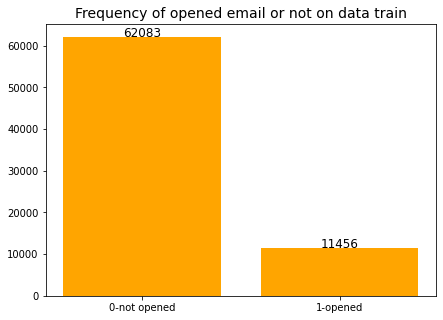

In [ ]:
plt.figure(figsize=(7,5))   #Width, height @ inch.
x = ['0-not opened','1-opened']
y = [62083, 11456]
plt.bar(x,y, color='orange')
plt.title('Frequency of opened email or not on data train', fontsize=14)
for index,data in enumerate(y): #label/detail data
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

In [ ]:
df_users.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [ ]:
df_users.describe()

,user_id,attr_1,attr_2,attr_3,age
count,127886.000000,78987.000000,127439.000000,127886.000000,78987.000000
mean,63961.168760,0.999823,0.998007,1.079782,31.370124
std,36928.842572,0.013312,0.044600,1.035413,11.591752
min,0.000000,0.000000,0.000000,0.000000,-17.000000
25%,31981.250000,1.000000,1.000000,0.000000,24.000000
50%,63958.500000,1.000000,1.000000,1.000000,29.000000
75%,95941.750000,1.000000,1.000000,2.000000,36.000000
max,127925.000000,1.000000,1.000000,4.000000,118.000000


In [ ]:
df_users.isna().sum()   #jumlah missing values tiap kolom

user_id        0
attr_1     48899
attr_2       447
attr_3         0
age        48899
domain         0
dtype: int64

(array([2.0000e+00, 4.2400e+02, 7.3400e+02, 3.1655e+04, 3.2773e+04,
        1.0792e+04, 1.7420e+03, 3.1400e+02, 4.1000e+01, 1.1000e+01,
        1.9000e+01, 4.8000e+02]),
 array([-17.  ,  -5.75,   5.5 ,  16.75,  28.  ,  39.25,  50.5 ,  61.75,
         73.  ,  84.25,  95.5 , 106.75, 118.  ]),
 <a list of 12 Patch objects>)

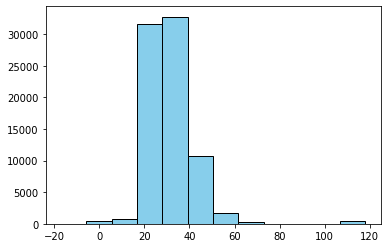

In [ ]:
plt.hist(df_users['age'], bins=12, color="skyblue", edgecolor="black")

#atribut age di drop karena banyak yg ngisi usia tidak sesuai

In [ ]:
df_users['age'].value_counts()

 25.0     4064
 24.0     3968
 26.0     3962
 27.0     3942
 28.0     3872
          ... 
 108.0       1
 99.0        1
-16.0        1
 91.0        1
 117.0       1
Name: age, Length: 106, dtype: int64

In [ ]:
df_test.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000
mean,2.835215,65049.007790,42.212703,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000
std,1.728489,37934.945847,12.276136,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162
min,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,32293.250000,35.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000
50%,3.000000,64683.000000,41.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,27984.50000
75%,4.000000,97776.500000,48.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,41976.75000
max,7.000000,127922.000000,79.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,55969.00000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

## **Pre-processing** (df_train): One hot encoding, remove noise, drop column, merge data





In [ ]:
#create a new data frame for feature engineering 

# One-hot encoding country code column (1-7)
df = df_train[['country_code']].copy()
encoded_columns = pd.get_dummies(df['country_code'])
df = df.join(encoded_columns).drop('country_code', axis=1)

# Extract weekday date & month @ grass date
df['weekday_date'] = pd.to_datetime(df_train.grass_date).dt.day_name()
df['month'] = pd.to_datetime(df_train.grass_date).dt.month

# Add subject line length column
df['subject_line_length']=df_train['subject_line_length'].copy()

# Convert last open day jadi tipe integer + set last open day jadi 0
df['last_open_day'] = df_train.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
df['last_open_day']=df['last_open_day'].astype(str).astype(int)

# Convert last login day jadi tipe integer
df['last_login_day'] = df_train.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
df['last_login_day'] = df['last_login_day'].astype(str).astype(int)

# Convert  last checkout day jadi tipe integer
df['last_checkout_day'] = df_train.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
df['last_checkout_day'] = df['last_checkout_day'].astype(str).astype(int)

df.head(5)

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day
0,0,0,0,1,0,0,0,Tuesday,7,44,19,6,18
1,0,0,0,1,0,0,0,Tuesday,7,44,9,4,8
2,0,0,0,0,0,1,0,Tuesday,7,49,14,5,5
3,1,0,0,0,0,0,0,Tuesday,7,49,49,9,53
4,0,0,0,0,0,1,0,Tuesday,7,49,227,6,221


In [ ]:
df.head()

,1,2,3,4,5,6,7,weekday_date,month,subject_line_length,last_open_day,last_login_day,last_checkout_day
0,0,0,0,1,0,0,0,Tuesday,7,44,19,6,18
1,0,0,0,1,0,0,0,Tuesday,7,44,9,4,8
2,0,0,0,0,0,1,0,Tuesday,7,49,14,5,5
3,1,0,0,0,0,0,0,Tuesday,7,49,49,9,53
4,0,0,0,0,0,1,0,Tuesday,7,49,227,6,221


In [ ]:
#remove noise in open count last 10/30/60 days

# Set last open days > 10 days ago to 0 on open_count_last_10_days
df['open_count_last_10_days'] = df_train['open_count_last_10_days'].copy()
df['open_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

df['open_count_last_30_days'] = df_train['open_count_last_30_days'].copy()
df['open_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)
df['open_count_last_60_days'] = df_train['open_count_last_60_days'].copy()
df['open_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

In [ ]:
df['open_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
df['open_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
df['open_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)
df.head()

,1,2,3,4,5,6,...,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,1,0,0,...,19,6,18,0,2,4
1,0,0,0,1,0,0,...,9,4,8,2,9,17
2,0,0,0,0,0,1,...,14,5,5,0,4,12
3,1,0,0,0,0,0,...,49,9,53,0,0,1
4,0,0,0,0,0,1,...,227,6,221,0,0,0


In [ ]:
#remove noise in login count last 10/30/60 days

# Set last open days > 10 days ago to 0 on open_login_last_10_days
df['login_count_last_10_days'] = df_train['login_count_last_10_days'].copy()
df['login_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)
df['login_count_last_30_days'] = df_train['login_count_last_30_days'].copy()
df['login_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)
df['login_count_last_60_days'] = df_train['login_count_last_60_days'].copy()
df['login_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

df['login_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
df['login_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
df['login_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

df.head()

,1,2,3,4,5,6,...,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days
0,0,0,0,1,0,0,...,0,2,4,12,43,99
1,0,0,0,1,0,0,...,2,9,17,18,48,90
2,0,0,0,0,0,1,...,0,4,12,24,69,119
3,1,0,0,0,0,0,...,0,0,1,9,23,69
4,0,0,0,0,0,1,...,0,0,0,2,5,5


In [ ]:
df['checkout_count_last_10_days'] = df_train['checkout_count_last_10_days'].copy()
df['checkout_count_last_30_days'] = df_train['checkout_count_last_30_days'].copy()
df['checkout_count_last_60_days'] = df_train['checkout_count_last_60_days'].copy()

In [ ]:
# remove noise in checkout count last 10/30/60 days

# Set last open days > 10 days ago to 0 on checkout_count_last_10_days
df['checkout_count_last_10_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)
df['checkout_count_last_30_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)
df['checkout_count_last_60_days'] = df.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

df['checkout_count_last_10_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
df['checkout_count_last_30_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
df['checkout_count_last_60_days'] = df.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

df.head()

,1,2,3,4,5,6,...,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0,0,0,1,0,0,...,12,43,99,0,5,10
1,0,0,0,1,0,0,...,18,48,90,1,1,4
2,0,0,0,0,0,1,...,24,69,119,5,19,27
3,1,0,0,0,0,0,...,9,23,69,0,0,6
4,0,0,0,0,0,1,...,2,5,5,0,0,0


## Processing df_users & merge with dftr_train

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [ ]:
df_users.isna().sum()

user_id        0
attr_1     48899
attr_2       447
attr_3         0
age        48899
domain         0
dtype: int64

In [ ]:
df['user_id']= df_train['user_id'].copy()
df['open_flag']=df_train['open_flag'].copy()

#merge
data_train = pd.merge(left=df, right=df_users, left_on='user_id', right_on='user_id')

In [ ]:
# One-hot encoding: domain column
encoded_columns = pd.get_dummies(data_train ['domain'])
data_train  = data_train.join(encoded_columns).drop('domain', axis=1)

# one-hot encoding: weekday date column
encoded_columns = pd.get_dummies(data_train['weekday_date'])
data_train = data_train.join(encoded_columns).drop('weekday_date', axis=1)

# assign -1 for missing data
data_train ['attr_1']= data_train['attr_1'].fillna(-1)
data_train ['attr_2']= data_train['attr_2'].fillna(-1)

data_train 

,1,2,3,4,5,6,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,...,0,0,0,0,1,0
1,0,0,0,1,0,0,...,0,0,0,0,1,0
2,0,0,0,0,0,1,...,0,0,0,0,1,0
3,1,0,0,0,0,0,...,0,0,0,0,1,0
4,0,0,0,0,0,1,...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,0,0,0,1,...,1,0,0,0,0,0
73535,0,1,0,0,0,0,...,1,0,0,0,0,0
73536,0,1,0,0,0,0,...,1,0,0,0,0,0
73537,0,1,0,0,0,0,...,1,0,0,0,0,0


In [ ]:
#delete columns (unnecessary for prediction)
data_train.drop(['user_id','age'], axis = 1, inplace = True)

In [ ]:
data_train

,1,2,3,4,5,6,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,...,0,0,0,0,1,0
1,0,0,0,1,0,0,...,0,0,0,0,1,0
2,0,0,0,0,0,1,...,0,0,0,0,1,0
3,1,0,0,0,0,0,...,0,0,0,0,1,0
4,0,0,0,0,0,1,...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,0,0,0,1,...,1,0,0,0,0,0
73535,0,1,0,0,0,0,...,1,0,0,0,0,0
73536,0,1,0,0,0,0,...,1,0,0,0,0,0
73537,0,1,0,0,0,0,...,1,0,0,0,0,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   1                            73539 non-null  uint8  
 1   2                            73539 non-null  uint8  
 2   3                            73539 non-null  uint8  
 3   4                            73539 non-null  uint8  
 4   5                            73539 non-null  uint8  
 5   6                            73539 non-null  uint8  
 6   7                            73539 non-null  uint8  
 7   month                        73539 non-null  int64  
 8   subject_line_length          73539 non-null  int64  
 9   last_open_day                73539 non-null  int64  
 10  last_login_day               73539 non-null  int64  
 11  last_checkout_day            73539 non-null  int64  
 12  open_count_last_10_days      73539 non-null  int64  
 13  open_count_last_

## Prediction and testing on data_train

In [ ]:
from sklearn.model_selection import train_test_split

# separate independent and target variable 
train_X = data_train.drop(columns=['open_flag'])
test_X = data_train['open_flag']

# randomly split data
x_train, x_test, y_train, y_test = train_test_split(train_X, test_X,test_size=0.3,random_state=0)

# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((51477, 42), (22062, 42), (51477,), (22062,))

### Random Forest

#### 100 tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 100 tree #
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

#accuracy
print("Accuracy Train (100):   ", clf.score(x_train,y_train))
print("Accuracy Test (100):   ", clf.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf.predict_proba(x_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf.predict_proba(x_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)

print("AUC Train (100):   ", auc_train_rf)
print("AUC Test (100):   ", auc_test_rf)

#fscore
y_pred = clf.predict(x_test)
y_true = y_test
f1_rf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score (100):   ", f1_rf)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC (100):   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train (100):    0.9998640169396041
Accuracy Test (100):    0.8870909255733841
AUC Train (100):    0.9999957588194086
AUC Test (100):    0.8670558791283584
F Score (100):    0.8749978169078866
MCC (100):    0.5105810371272698


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[18051   554]
 [ 1937  1520]]


Text(0.5, 1.0, 'Confusion Matrix Model Random Forest')

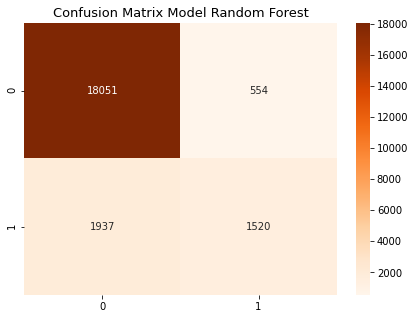

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='', cmap='Oranges')
plt.title("Confusion Matrix Model Random Forest", fontsize=13)

#### 50 tree

In [ ]:
# 50 tree #
clf50 = RandomForestClassifier(random_state=0, n_estimators=50)
clf50.fit(x_train,y_train)

#accuracy
print("Accuracy Train (50):   ", clf50.score(x_train,y_train))
print("Accuracy Test (50):   ", clf50.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf50.predict_proba(x_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf50.predict_proba(x_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)

print("AUC Train (50):   ", auc_train_rf)
print("AUC Test (50):   ", auc_test_rf)

#fscore
y_pred = clf50.predict(x_test)
y_true = y_test
f1_rf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score (50):   ", f1_rf)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC (50):   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train (50):    0.9994366416069312
Accuracy Test (50):    0.8867283111231983
AUC Train (50):    0.9999947409360666
AUC Test (50):    0.8627150610755381
F Score (50):    0.8745735849361567
MCC (50):    0.5087985794700243


#### 150 tree

In [ ]:
# 150 tree #
clf150 = RandomForestClassifier(random_state=0, n_estimators=150)
clf150.fit(x_train,y_train)

#accuracy
print("Accuracy Train (150):   ", clf150.score(x_train,y_train))
print("Accuracy Test (150):   ", clf150.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf150.predict_proba(x_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf150.predict_proba(x_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)

print("AUC Train (150):   ", auc_train_rf)
print("AUC Test (150):   ", auc_test_rf)

#fscore
y_pred = clf150.predict(x_test)
y_true = y_test
f1_rf = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score (150):   ", f1_rf)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC (150):   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train (150):    0.9999028692425743
Accuracy Test (150):    0.8874535400235699
AUC Train (150):    0.9999951952455807
AUC Test (150):    0.8694346723911858
F Score (150):    0.8755796693346736
MCC (150):    0.5128685827456969


### Neural Network

#### 100 hidden layer

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier()
clf2.fit(x_train,y_train)

print("Accuracy Train:   ", clf2.score(x_train,y_train))
print("Accuracy Test:   ", clf2.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf2.predict_proba(x_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf2.predict_proba(x_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)

print("AUC Train:   ", auc_train_nn)
print("AUC Test:   ", auc_test_nn)

#fscore
y_pred = clf2.predict(x_test)
y_true = y_test
f1_nn = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_nn)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC:   ", matthews_corrcoef(y_true, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Train:    0.890164539503079
Accuracy Test:    0.8821956304958752
AUC Train:    0.8700704463259159
AUC Test:    0.8523403083935885
F Score:    0.8686395481
MCC:    0.4843366687760598


#### 50 hidden layer

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes = 50)
clf2.fit(x_train,y_train)

print("Accuracy Train (50):   ", clf2.score(x_train,y_train))
print("Accuracy Test (50):   ", clf2.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf2.predict_proba(x_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf2.predict_proba(x_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)

print("AUC Train (50):   ", auc_train_nn)
print("AUC Test (50):   ", auc_test_nn)

#fscore
y_pred = clf2.predict(x_test)
y_true = y_test
f1_nn = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score (50):   ", f1_nn)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC (50):   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train (50):    0.8902616702605047
Accuracy Test (50):    0.8833741274589793
AUC Train (50):    0.8605070038971304
AUC Test (50):    0.8518996195202595
F Score (50):    0.8708594774072557
MCC (50):    0.49298315673559245


#### 150 hidden layer

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes = 150)
clf2.fit(x_train,y_train)

print("Accuracy Train (150):   ", clf2.score(x_train,y_train))
print("Accuracy Test (150):   ", clf2.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf2.predict_proba(x_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf2.predict_proba(x_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)

print("AUC Train:   ", auc_train_nn)
print("AUC Test:   ", auc_test_nn)

#fscore
y_pred = clf2.predict(x_test)
y_true = y_test
f1_nn = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score (150):   ", f1_nn)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC (150):   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train (150):    0.891815762379315
Accuracy Test (150):    0.8813797479829572
AUC Train:    0.8760045279361561
AUC Test:    0.8544365346375095
F Score (150):    0.8693116633812769
MCC (150):    0.4859640514663063


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
clf3 = GaussianNB()
clf3.fit(x_train,y_train)

print("Accuracy Train:   ", clf3.score(x_train,y_train))
print("Accuracy Test:   ", clf3.score(x_test,y_test))

#auc
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf3.predict_proba(x_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), clf3.predict_proba(x_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)

print("AUC Train:   ", auc_train_nb)
print("AUC Test:   ", auc_test_nb)

#fscore
y_pred = clf3.predict(x_test)
y_true = y_test
f1_nb = metrics.f1_score(y_true, y_pred, average='weighted')
print("F Score:   ", f1_nb)

#mcc
from sklearn.metrics import matthews_corrcoef
print("MCC:   ", matthews_corrcoef(y_true, y_pred))

Accuracy Train:    0.831419857412048
Accuracy Test:    0.8339679086211585
AUC Train:    0.8100117723096638
AUC Test:    0.8109243699438807
F Score:    0.839212674816173
MCC:    0.41493262915930135


## Processing df_test
1. One-hot encoding
2. Remove noise

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

In [ ]:
#create a new data frame for feature engineering 

# One-hot encoding country code column (1-7)
dftest = df_test[['country_code']].copy()
encoded_columns = pd.get_dummies(dftest['country_code'])
dftest = dftest.join(encoded_columns).drop('country_code', axis=1)

# Extract weekday date & month @ grass date
dftest['weekday_date'] = pd.to_datetime(df_test.grass_date).dt.day_name()
dftest['month'] = pd.to_datetime(df_test.grass_date).dt.month

# Add subject line length column
dftest['subject_line_length'] = df_test['subject_line_length'].copy()

# Convert last open day jadi tipe integer + set last open day jadi 0
dftest['last_open_day'] = df_test.last_open_day.apply(lambda x: 1000 if x =='Never open' else x)
dftest['last_open_day'] = dftest['last_open_day'].astype(str).astype(int)

# Convert last login day jadi tipe integer
dftest['last_login_day'] = df_test.last_login_day.apply(lambda x: 20000 if x =='Never login' else x)
dftest['last_login_day'] = dftest['last_login_day'].astype(str).astype(int)

# Convert  last checkout day jadi tipe integer
dftest['last_checkout_day'] = df_test.last_checkout_day.apply(lambda x: 1500 if x =='Never checkout' else x)
dftest['last_checkout_day'] = dftest['last_checkout_day'].astype(str).astype(int)

df.head(5)

,1,2,3,4,5,6,...,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,user_id,open_flag
0,0,0,0,1,0,0,...,99,0,5,10,43,0
1,0,0,0,1,0,0,...,90,1,1,4,102,1
2,0,0,0,0,0,1,...,119,5,19,27,177,0
3,1,0,0,0,0,0,...,69,0,0,6,184,0
4,0,0,0,0,0,1,...,5,0,0,0,221,0


In [ ]:
#remove noise in open count last 10/30/60 days

# Set last open days > 10 days ago to 0 on open_count_last_10_days
dftest['open_count_last_10_days'] = df_test['open_count_last_10_days'].copy()
dftest['open_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 10) else x['open_count_last_10_days'],axis =1)

dftest['open_count_last_30_days'] = df_test['open_count_last_30_days'].copy()
dftest['open_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 30) else x['open_count_last_30_days'],axis =1)
dftest['open_count_last_60_days'] = df_test['open_count_last_60_days'].copy()
dftest['open_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_open_day'] > 60) else x['open_count_last_60_days'],axis =1)

In [ ]:
dftest['open_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 10) & (x['open_count_last_10_days']==0)) else x['open_count_last_10_days'],axis=1)
dftest['open_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 30) & (x['open_count_last_30_days']==0)) else x['open_count_last_30_days'],axis =1)
dftest['open_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_open_day'] <= 60) & (x['open_count_last_60_days']==0)) else x['open_count_last_60_days'],axis =1)
dftest.head()

,1,2,3,4,5,6,...,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,0,0,0,0,0,1,...,27,2,13,0,3,4
1,0,0,0,0,0,1,...,7,5,383,1,1,1
2,0,0,0,0,1,0,...,34,1,3,0,0,1
3,1,0,0,0,0,0,...,63,5,5,0,0,0
4,0,0,0,0,1,0,...,6,5,54,1,1,1


In [ ]:
#remove noise in login count last 10/30/60 days

# Set last open days > 10 days ago to 0 on open_login_last_10_days
dftest['login_count_last_10_days'] = df_test['login_count_last_10_days'].copy()
dftest['login_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 10) else x['login_count_last_10_days'],axis =1)
dftest['login_count_last_30_days'] = df_test['login_count_last_30_days'].copy()
dftest['login_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 30) else x['login_count_last_30_days'],axis =1)
dftest['login_count_last_60_days'] = df_test['login_count_last_60_days'].copy()
dftest['login_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_login_day'] > 60) else x['login_count_last_60_days'],axis =1)

dftest['login_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 10) & (x['login_count_last_10_days']==0)) else x['login_count_last_10_days'],axis=1)
dftest['login_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 30) & (x['login_count_last_30_days']==0)) else x['login_count_last_30_days'],axis =1)
dftest['login_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_login_day'] <= 60) & (x['login_count_last_60_days']==0)) else x['login_count_last_60_days'],axis =1)

dftest.head()

,1,2,3,4,5,6,...,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days
0,0,0,0,0,0,1,...,0,3,4,10,34,134
1,0,0,0,0,0,1,...,1,1,1,5,5,5
2,0,0,0,0,1,0,...,0,0,1,13,19,38
3,1,0,0,0,0,0,...,0,0,0,43,110,173
4,0,0,0,0,1,0,...,1,1,1,4,12,39


In [ ]:
dftest['checkout_count_last_10_days'] = df_test['checkout_count_last_10_days'].copy()
dftest['checkout_count_last_30_days'] = df_test['checkout_count_last_30_days'].copy()
dftest['checkout_count_last_60_days'] = df_test['checkout_count_last_60_days'].copy()

In [ ]:
# remove noise in checkout count last 10/30/60 days

# Set last open days > 10 days ago to 0 on checkout_count_last_10_days
dftest['checkout_count_last_10_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 10) else x['checkout_count_last_10_days'],axis =1)
dftest['checkout_count_last_30_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 30) else x['checkout_count_last_30_days'],axis =1)
dftest['checkout_count_last_60_days'] = dftest.apply(lambda x: 0 if (x['last_checkout_day'] > 60) else x['checkout_count_last_60_days'],axis =1)

dftest['checkout_count_last_10_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 10) & (x['checkout_count_last_10_days']==0)) else x['checkout_count_last_10_days'],axis=1)
dftest['checkout_count_last_30_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 30) & (x['checkout_count_last_30_days']==0)) else x['checkout_count_last_30_days'],axis =1)
dftest['checkout_count_last_60_days'] = dftest.apply(lambda x: 1 if ((x['last_checkout_day'] <= 60) & (x['checkout_count_last_60_days']==0)) else x['checkout_count_last_60_days'],axis =1)

dftest.head()

,1,2,3,4,5,6,...,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days
0,0,0,0,0,0,1,...,10,34,134,0,6,18
1,0,0,0,0,0,1,...,5,5,5,0,0,0
2,0,0,0,0,1,0,...,13,19,38,2,2,2
3,1,0,0,0,0,0,...,43,110,173,2,5,5
4,0,0,0,0,1,0,...,4,12,39,0,0,2


## Merge user ke dftest

In [ ]:
dftest['user_id']= df_test['user_id'].copy()
df_test_1 = pd.merge(left=dftest, right=df_users, left_on='user_id', right_on='user_id')

In [ ]:
# Apply one-hot encoding for the domain column
encoded_columns = pd.get_dummies(df_test_1['domain'])
df_test_1 = df_test_1.join(encoded_columns).drop('domain', axis=1)

#-1 assigned for missing data
df_test_1['attr_1']= df_test_1['attr_1'].fillna(-1)
df_test_1['attr_2']= df_test_1['attr_2'].fillna(-1)

# Apply one-hot encoding for the weekday date column
encoded_columns = pd.get_dummies(df_test_1['weekday_date'])
df_test_1 = df_test_1.join(encoded_columns).drop('weekday_date', axis=1)
df_test_1

,1,2,3,4,5,6,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,...,0,0,0,0,1,0
1,0,0,0,0,0,1,...,0,0,0,0,1,0
2,0,0,0,0,1,0,...,0,0,0,0,1,0
3,1,0,0,0,0,0,...,0,0,0,0,1,0
4,0,0,0,0,1,0,...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0,0,0,0,0,1,...,0,0,1,0,0,0
55966,0,0,0,0,0,1,...,0,0,1,0,0,0
55967,0,0,0,0,0,1,...,0,0,1,0,0,0
55968,0,0,0,0,0,1,...,0,0,1,0,0,0


In [ ]:
#delete columns (unnecessary for prediction)
df_test_1.drop(['user_id','age'], axis = 1, inplace = True)

In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55970 entries, 0 to 55969
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   1                            55970 non-null  uint8  
 1   2                            55970 non-null  uint8  
 2   3                            55970 non-null  uint8  
 3   4                            55970 non-null  uint8  
 4   5                            55970 non-null  uint8  
 5   6                            55970 non-null  uint8  
 6   7                            55970 non-null  uint8  
 7   month                        55970 non-null  int64  
 8   subject_line_length          55970 non-null  int64  
 9   last_open_day                55970 non-null  int64  
 10  last_login_day               55970 non-null  int64  
 11  last_checkout_day            55970 non-null  int64  
 12  open_count_last_10_days      55970 non-null  int64  
 13  open_count_last_

## Prediction of dftest

In [ ]:
#USE RANDOM FOREST
predictions = clf.predict(df_test_1)

In [ ]:
from google.colab import files
columns_titles = ["row_id","open_flag"]
predictions_df = pd.DataFrame(predictions)
predictions_df['row_id'] = predictions_df.index
predictions_df.rename(columns = {0: 'open_flag'}, inplace = True)
predictions_df['open_flag']= predictions_df['open_flag'].astype(int)
predictions_df=predictions_df.reindex(columns=columns_titles)
print(predictions_df)

       row_id  open_flag
0           0          0
1           1          0
2           2          0
3           3          0
4           4          0
...       ...        ...
55965   55965          0
55966   55966          0
55967   55967          0
55968   55968          0
55969   55969          1

[55970 rows x 2 columns]


In [ ]:
predictions_df['open_flag'].value_counts()

0    51297
1     4673
Name: open_flag, dtype: int64

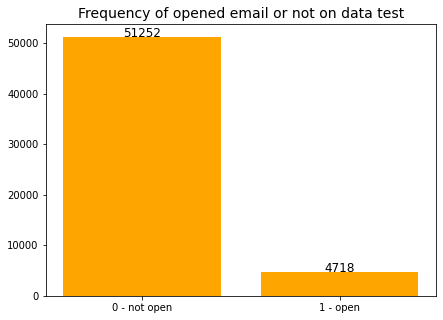

In [ ]:
plt.figure(figsize=(7,5))
x = ['0 - not open', '1 - open']
y = [51252, 4718]
plt.bar(x,y, color='orange')
plt.title('Frequency of opened email or not on data test', fontsize=14)
for index,data in enumerate(y):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.show()

In [ ]:
filename = 'hasilprediksi.csv'
predictions_df.to_csv(filename, index=False)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>